## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
combo_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combo_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice = combo_data["Mouse ID"].value_counts()
total_mice = len(mice)
total_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combo_data.loc[combo_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = pd.DataFrame(duplicate_mice)
g989_data

,0
0,g989


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combo_data[combo_data["Mouse ID"].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
single_mice = clean_df["Mouse ID"].value_counts()
single_mice_total = len(single_mice)
single_mice_total

248

## Summary Statistics

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_regimen_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
drug_regimen_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
drug_regimen_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_regimen_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
drug_regimen_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_regimen_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
drug_regimen_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
drug_regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
regimen_summary = pd.DataFrame(({"Mean":drug_regimen_mean, "Median":drug_regimen_median, "Variance":drug_regimen_variance,
                                "Standard Deviation":drug_regimen_std, "SEM":drug_regimen_sem}))
regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

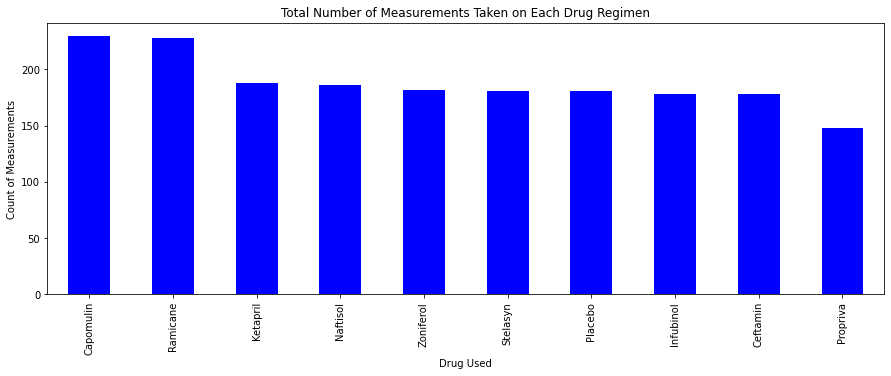

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
plt.figure(figsize=(15,5))
clean_df["Drug Regimen"].value_counts().plot(kind="bar", color="b")

# Format and label for clarity
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Used")
plt.ylabel("Count of Measurements")

plt.show

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


In [17]:
# Get gender data
groupby_mf=clean_df.groupby(["Mouse ID","Sex"])
groupby_mf
mf_df = pd.DataFrame(groupby_mf.size())
mouse_mf=pd.DataFrame(mf_df.groupby(["Sex"]).count())
mouse_mf.columns = ["Total Count"]
mouse_mf["Percentage of Sex"] = (100*(mouse_mf["Total Count"]/mouse_mf["Total Count"].sum()))
mouse_mf["Percentage of Sex"] = mouse_mf["Percentage of Sex"]
mouse_mf

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


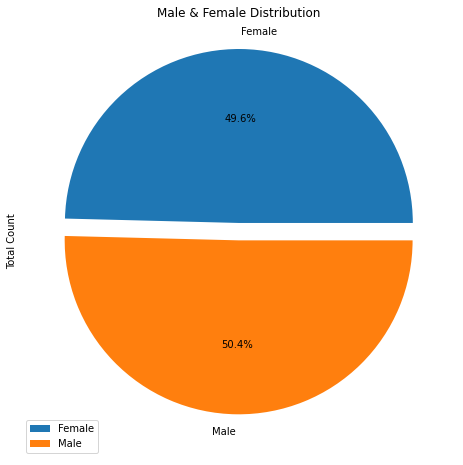

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode=(.1,0)
mfchart = mouse_mf.plot.pie(y="Total Count",figsize=(12,8),explode=explode, autopct="%1.1f%%")

plt.title("Male & Female Distribution")
plt.show()


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=clean_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint=greatest_timepoint.reset_index()
greatest_timepoint


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [21]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_vol = pd.merge(clean_df,greatest_timepoint)
last_tumor_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
toomah_vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatments in treatments:
    lastvol=last_tumor_vol.loc[last_tumor_vol["Drug Regimen"] == treatments, "Tumor Volume (mm3)"]
    
  # add subset 
    toomah_vol.append(lastvol)  
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Quartiles = lastvol.quantile([.25,.5,.75])
LowerQuartile = Quartiles[0.25]
UpperQuartile = Quartiles[0.75]
InterQuartile = UpperQuartile-LowerQuartile
    
# Determine outliers using upper and lower bounds
LowerBound=LowerQuartile - (1.5*InterQuartile)
UpperBound=UpperQuartile + (1.5*InterQuartile)

print(treatments)
print(f"The lower quartile of final tumor volumes is: {LowerQuartile}")
print(f"The upper quartile of final tumor volumes is: {UpperQuartile}")
print(f"The interquartile range of tumor volumes is: {InterQuartile}")
print(f"The the median of tumor volumes is {Quartiles[.5]}")
print(f"Volumes below {LowerBound} are likely outliers.")
print(f"Volumes above {UpperBound} are likely outliers.")


Ceftamin
The lower quartile of final tumor volumes is: 48.72207785
The upper quartile of final tumor volumes is: 64.29983003
The interquartile range of tumor volumes is: 15.577752179999997
The the median of tumor volumes is 59.85195552
Volumes below 25.355449580000002 are likely outliers.
Volumes above 87.66645829999999 are likely outliers.


In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
